leaf, inde# Clustering 

In [ ]:
import pandas as pd

In [ ]:
cardio = pd.read_csv('Desktop/Purdue/Python/Deviare/Cardiotocography Dataset.csv')

# Principal Component Analysis

### Reducing the no. of variables by extracting Principal Components 

## Step 1 : We need to separate X and Y

In [155]:
X = cardio.drop('NSP', axis = 1)
Y = cardio.NSP

## Step 2 : Standardise the data

In [156]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

## Step 3 : Correlation matrix for X

In [157]:
corr_mat = np.corrcoef(X_std, rowvar = False)

## Step 4 : Eigen value and Vector

In [159]:
eig_values, eig_vectors = np.linalg.eig(corr_mat)

### PC1 = phi1 * X1 + phi2 * X2....

In [168]:
var_cap = eig_values.round(2)/eig_values.sum() * 100
var_cap.round(2)

array([28.86, 16.71,  8.71,  7.14,  5.81,  4.86,  4.67,  4.38,  3.62,
        3.05,  2.76,  2.38,  1.86,  1.57,  1.29,  0.86,  0.62,  0.57,
        0.14,  0.24,  0.  ])

In [170]:
cum_var = np.cumsum(var_cap).round(2)

In [175]:
coef = pd.DataFrame({'Eigen_values' : eig_values.round(2), 
                     'Variance_Captured' : var_cap.round(2),
                     'Cumulative_Variance' : cum_var.round(2),},
                      index = ['PC'+str(i) for i in range(1,cardio.shape[1])])

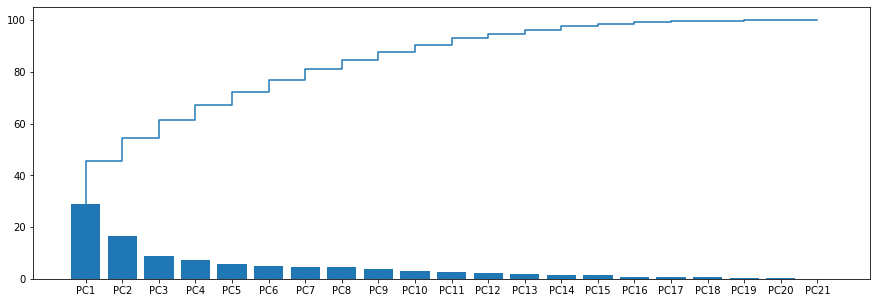

In [182]:
plt.figure(figsize= (15,5))
plt.bar(coef.index,coef.Variance_Captured)
plt.step(coef.index,coef.Cumulative_Variance )
plt.show()

In [197]:
eig_vectors

array([[ 2.24080402e-01, -2.76301759e-01,  3.41892638e-01,
        -6.02257046e-02, -8.20451186e-02,  4.16842383e-02,
         2.49338515e-01,  1.77115109e-01,  9.82578150e-02,
        -6.79909875e-02, -1.89521219e-01,  1.17873171e-01,
         1.08527977e-01, -1.22990426e-01, -7.35241241e-02,
         2.37668610e-01, -3.62850820e-01, -4.63523699e-01,
         9.46016761e-02, -3.77581607e-01,  5.97495652e-17],
       [-4.28073957e-02, -2.78880548e-01, -1.86734931e-01,
         4.36411990e-01,  1.01723907e-01, -1.29806313e-01,
        -4.30658463e-01, -9.42582902e-02, -2.60871474e-01,
        -1.52873219e-01,  4.63891865e-02, -9.96559011e-02,
        -2.12365429e-01, -1.38244474e-01,  4.11988306e-02,
         5.02431655e-01, -1.34309371e-01,  6.16869322e-02,
         6.74292741e-03, -1.72558284e-01,  3.60251598e-16],
       [-8.05028195e-02, -3.86689632e-02,  9.99216251e-02,
         1.82804263e-03,  6.34791461e-01,  1.74239491e-01,
         2.98492191e-02,  4.94805995e-01, -2.49110470e

In [184]:
from sklearn.decomposition import PCA

In [185]:
pca = PCA(n_components = 6)

In [186]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [187]:
pca.components_ # vector

array([[-0.22408041,  0.04280739,  0.08050282,  0.1275821 ,  0.27936202,
         0.05851729,  0.20398176, -0.14488021,  0.31595348, -0.21682199,
        -0.00838811,  0.3130197 , -0.33168872,  0.13314121,  0.25060485,
         0.12305903, -0.26286184, -0.30920799, -0.27638082,  0.29063052,
        -0.07065839],
       [ 0.2763018 ,  0.27888061,  0.03866896,  0.02458826,  0.01959382,
        -0.08006079, -0.11419784, -0.12299652,  0.13575563, -0.14138403,
         0.09655628,  0.28368108, -0.1434809 ,  0.37949162,  0.24066342,
         0.12715931,  0.36637451,  0.32490335,  0.37539248,  0.10075995,
         0.2259412 ],
       [ 0.34189194, -0.18673597,  0.09992166, -0.11290557,  0.2034682 ,
         0.07373637,  0.33548957,  0.49209455, -0.07430521,  0.31983924,
        -0.43283176,  0.06272138,  0.03100382,  0.18723807,  0.10552554,
        -0.00348757,  0.02493166, -0.02122007,  0.0668195 ,  0.26561857,
        -0.04010149],
       [ 0.06022117, -0.43641869, -0.00182784, -0.3008657 

In [188]:
pca.explained_variance_ # value

array([6.06613694, 3.51059685, 1.82624718, 1.4986969 , 1.21825699,
       1.02438604])

In [189]:
pca.explained_variance_ratio_ # %age variance captured

array([0.28872779, 0.16709265, 0.08692325, 0.07133295, 0.05798495,
       0.04875734])

In [194]:
final_data = pd.DataFrame(pca.fit_transform(X_std), 
                          columns=['PC'+str(i) for i in range(1,7)])
final_data['NSP'] = Y

In [198]:
final_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,NSP
0,-0.260678,-2.561701,1.280899,1.832781,0.402492,-0.241200,2
1,1.989242,2.266550,-1.107935,-0.584506,-0.312136,0.621104,1
2,2.015691,1.998412,-1.284000,-0.277832,-0.646341,0.308454,1
3,2.157733,2.101173,-2.188742,1.658587,0.021991,-0.443665,1
4,1.781391,2.161913,-2.492769,0.765705,0.206212,-0.328622,1


    - Hierarchical
    - K means 

## Hierarchical Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
univ = pd.read_csv('/Users/nimisha/Desktop/Purdue/Python/Deviare/University.csv')
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


# Step 1: Standardisation of data

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
univ_std = sc.fit_transform(univ.drop('Univ', axis =1))

In [4]:
univ_std

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

# Visualize 

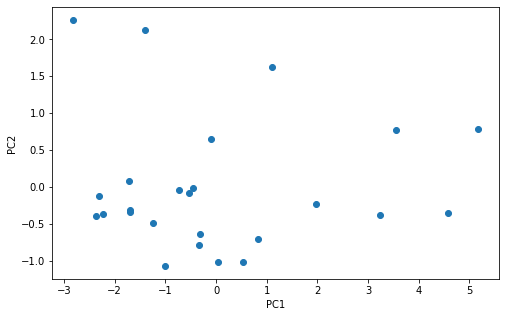

In [5]:
# create PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(univ_std)
pca.explained_variance_ratio_.sum()

univ_pca = pd.DataFrame(pca.fit_transform(univ_std), columns = ['Pc1','Pc2'])
univ_pca['Univ'] = univ.Univ

plt.figure(figsize = (8,5))
plt.scatter(univ_pca.Pc1, univ_pca.Pc2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Hieracrhical CLustering

# 1. Distance matrix

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

In [32]:
pdist(univ_pca.drop('Univ', axis = 1))

array([3.78541202, 3.43076493, 1.05670674, 0.81929797, 0.99500732,
       0.62035981, 0.72686177, 1.52335856, 3.2080376 , 1.35696271,
       1.19234268, 1.05155743, 4.29929155, 1.40840786, 6.4520543 ,
       1.0253906 , 5.63379602, 1.86855391, 1.94225057, 3.08932016,
       1.09009689, 1.54281578, 4.91694787, 1.60491267, 3.98447863,
       3.10227901, 3.83127124, 2.83629836, 3.1693207 , 3.92873346,
       2.6832619 , 1.42580405, 2.43185441, 3.28285709, 4.34456211,
       6.60384216, 2.69530555, 8.1308994 , 2.79957249, 7.84603286,
       4.69407477, 3.16391461, 5.39162047, 3.26609448, 4.68891853,
       6.54071339, 2.43218826, 2.4976667 , 2.67687485, 3.43427526,
       3.17331608, 2.81867109, 4.02837393, 2.56269518, 3.23082596,
       2.26743606, 2.84981654, 2.91940994, 3.90205275, 4.14880403,
       3.41455398, 3.99081318, 2.34807505, 1.55773763, 2.04165807,
       2.38013487, 2.7111953 , 2.58116227, 3.83978178, 0.7324402 ,
       1.00161824, 0.67566526, 0.84523549, 1.66833352, 2.26066

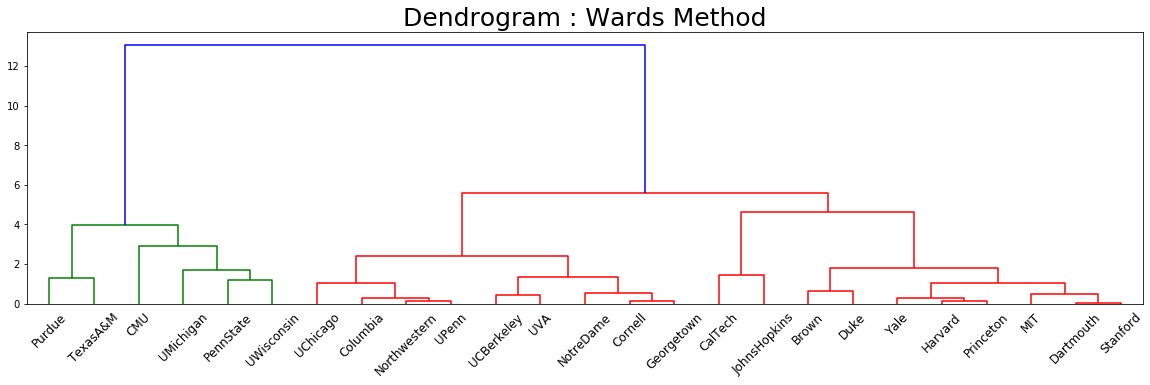

In [54]:
Z = linkage(univ_pca.drop('Univ', axis = 1), metric = 'euclidean', method = 'ward')
plt.figure(figsize = (20,5))
dendrogram(Z, 
           labels= univ_pca.Univ.values,leaf_font_size = 12)
plt.title('Dendrogram : Wards Method', size = 25)
plt.show()

# We nneed 3 Clusters 

In [55]:
from scipy.cluster.hierarchy import fcluster

In [78]:
clus_labels = fcluster(Z, criterion= 'maxclust', t = 3)

In [84]:
univ_h = univ_pca.copy()
univ_h['Clus_label'] = clus_labels
univ_h.Clus_label.replace([1,2,3],['Clus1','Clus2','Clus3'],inplace = True)

In [76]:
import seaborn as sns

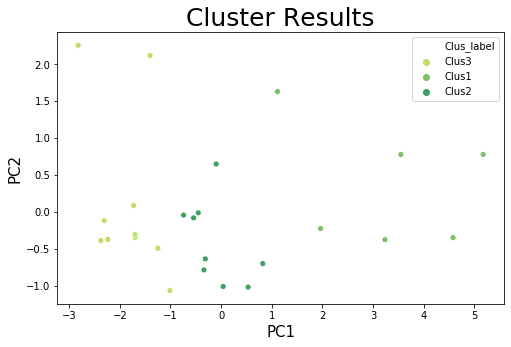

In [105]:
plt.figure(figsize = (8,5))
sns.scatterplot('Pc1', 'Pc2', hue = 'Clus_label',data = univ_h, palette = 'summer_r')
#plt.legend(['CLus1', 'CLus2','CLus3'])
plt.xlabel('PC1', size = 15)
plt.ylabel('PC2', size = 15)
plt.title('Cluster Results', size = 25 )
plt.show()

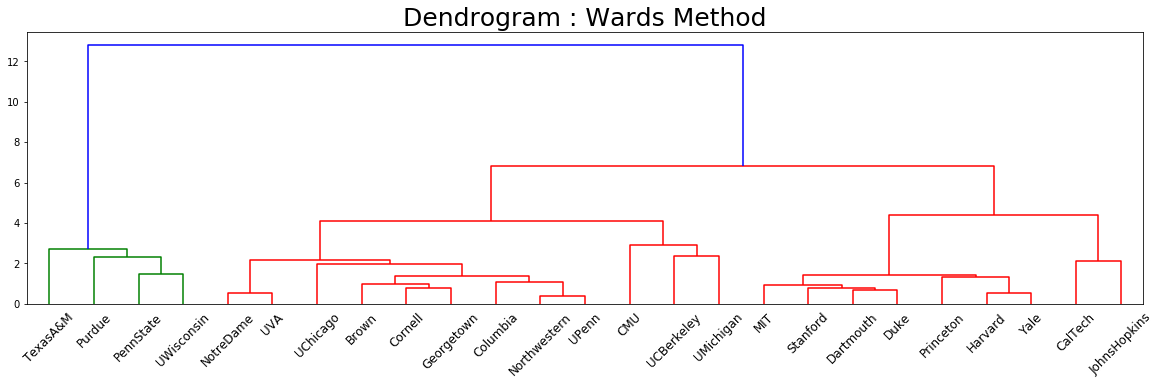

In [98]:
Z = linkage(univ_std, metric = 'euclidean', method = 'ward')
plt.figure(figsize = (20,5))
dendrogram(Z, 
           labels= univ.Univ.values,leaf_font_size = 12)
plt.title('Dendrogram : Wards Method', size = 25)
plt.show()

In [99]:
clus_labels = fcluster(Z, criterion= 'maxclust', t = 3)
univ_h_d = univ.copy()
univ_h_d['Clus_label'] = clus_labels
univ_h_d.Clus_label.replace([1,2,3],['Clus1','Clus2','Clus3'],inplace = True)
univ_h_d.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clus_label
0,Brown,1310,89,22,13,22704,94,Clus2
1,CalTech,1415,100,25,6,63575,81,Clus3
2,CMU,1260,62,59,9,25026,72,Clus2
3,Columbia,1310,76,24,12,31510,88,Clus2
4,Cornell,1280,83,33,13,21864,90,Clus2


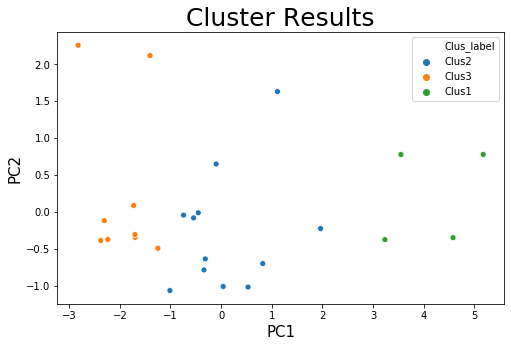

In [104]:
plt.figure(figsize = (8,5))
sns.scatterplot(univ_h.Pc1, univ_h.Pc2 , hue = univ_h_d.Clus_label, cmap = 'summer_r')
#plt.legend(['CLus1', 'CLus2','CLus3'])
plt.xlabel('PC1', size = 15)
plt.ylabel('PC2', size = 15)
plt.title('Cluster Results', size = 25 )
plt.show()

# K Means 

In [106]:
# Find Out optimized number of Clusters 

In [107]:
from sklearn.cluster import KMeans

In [126]:
errors = {}
for i in range(1, len(univ)):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(univ_pca.drop('Univ', axis = 1))
    errors['# CLusters = '+str(i)] = [kmeans.inertia_]  # total within ss
clust_error = pd.DataFrame(errors, index = ['errors']).T
clust_error

,errors
# CLusters = 1,134.972530
# CLusters = 2,49.346647
# CLusters = 3,30.740808
# CLusters = 4,20.577040
# CLusters = 5,14.215341
# CLusters = 6,10.667550
# CLusters = 7,8.229981
# CLusters = 8,6.561269
# CLusters = 9,5.080367
# CLusters = 10,4.166863


## plot this data to find optimised clusters

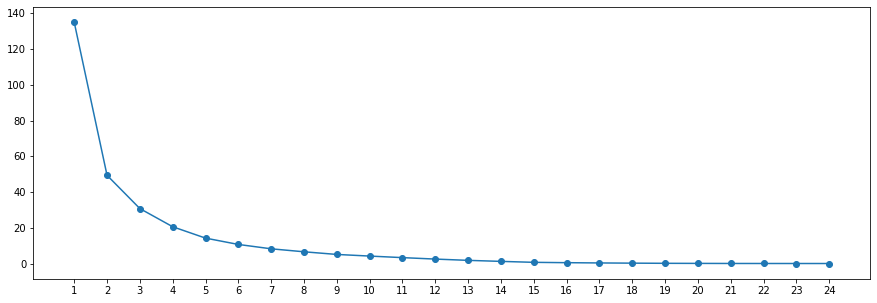

In [135]:
plt.figure(figsize = (15,5))
plt.plot(range(1,len(clust_error.index)+1), clust_error)
plt.scatter(range(1,len(clust_error.index)+1), clust_error, )
plt.xticks(range(1,len(clust_error.index)+1))
plt.show()

In [136]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(univ_pca.drop('Univ', axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [141]:
clus_labels = kmeans.labels_

univ_km = univ_pca.copy()
univ_km['CLus_labels'] = clus_labels
univ_km['CLus_labels'].replace([0,1,2,3],['Clus1','Clus2','Clus3', 'Clus4'],inplace = True)
univ_km.head()

In [149]:
kmeans.cluster_centers_

array([[ 4.13339128,  0.20905129],
       [ 0.18067263, -0.20197376],
       [-1.7869311 , -0.37413168],
       [-2.1127576 ,  2.1892798 ]])

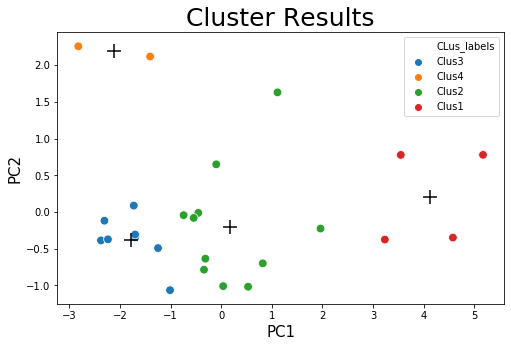

In [162]:
plt.figure(figsize = (8,5))
sns.scatterplot(univ_km.Pc1, univ_km.Pc2 , hue = univ_km.CLus_labels, cmap = 'viridis',marker = 'o', s = 75 )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = '+', c= 'black', s = 200)
plt.xlabel('PC1', size = 15)
plt.ylabel('PC2', size = 15)
plt.title('Cluster Results', size = 25 )
plt.show()

In [164]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(univ_std)
clus_labels = kmeans.labels_
univ_km_d = univ.copy()
univ_km_d['CLus_labels'] = clus_labels
univ_km_d['CLus_labels'].replace([0,1,2,3],['Clus1','Clus2','Clus3', 'Clus4'],inplace = True)
univ_km_d.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,CLus_labels
0,Brown,1310,89,22,13,22704,94,Clus1
1,CalTech,1415,100,25,6,63575,81,Clus4
2,CMU,1260,62,59,9,25026,72,Clus2
3,Columbia,1310,76,24,12,31510,88,Clus2
4,Cornell,1280,83,33,13,21864,90,Clus2


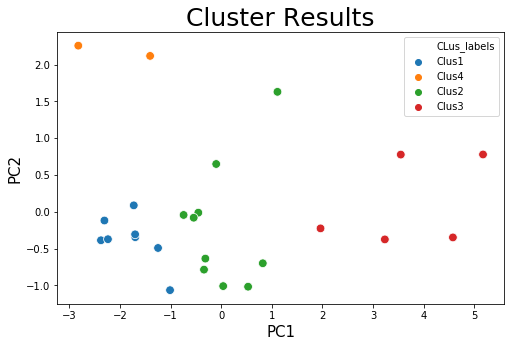

In [167]:
plt.figure(figsize = (8,5))
sns.scatterplot(univ_km.Pc1, univ_km.Pc2 , hue = univ_km_d.CLus_labels, cmap = 'viridis',marker = 'o', s = 75 )
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = '+', c= 'black', s = 200)
plt.xlabel('PC1', size = 15)
plt.ylabel('PC2', size = 15)
plt.title('Cluster Results', size = 25 )
plt.show()


# Cluster Profiling 

In [178]:
clus_prof1 = univ_h_d.groupby('Clus_label').mean().round(1)
clus_prof1.insert(0, 'size',univ_h_d.groupby('Clus_label').size() )

clus_prof1

,size,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Clus_label,,,,,,,
Clus1,4,1061.5,38.8,70.0,19.2,9953.0,71.8
Clus2,12,1262.5,78.5,40.1,12.8,22858.0,87.6
Clus3,9,1362.8,90.6,24.3,9.7,41176.9,92.2


In [181]:
clus_prof2 = univ_km_d.groupby('CLus_labels').mean().round(1)
clus_prof2.insert(0, 'size',univ_km_d.groupby('CLus_labels').size() )
clus_prof2

,size,SAT,Top10,Accept,SFRatio,Expenses,GradRate
CLus_labels,,,,,,,
Clus1,8,1356.9,91.1,21.5,10.9,33878.8,94.5
Clus2,10,1266.0,78.8,39.1,12.5,23612.2,87.2
Clus3,5,1085.2,44.0,69.6,18.6,11056.4,74.4
Clus4,2,1360.0,87.5,34.5,6.5,61133.0,84.0
